In [12]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
# Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

# Now drop the 'Id' colum since we can not use it as a feature to train our model.
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

In [14]:
y_train = train_df['SalePrice']
X_train = train_df.drop('SalePrice', axis=1)
X_test = test_df.copy()

In [15]:
del train_df, test_df

In [16]:
print(X_train.shape)
print(X_test.shape)

(1460, 79)
(1459, 79)


In [17]:
all_data = pd.concat([X_train, X_test])
all_data.shape

(2919, 79)

In [18]:
#call the impute function in process module
from preprocess import impute
df_train = impute(all_data)

In [19]:
#use one_hot encoding to dummify all the category data
one_hot_df = pd.get_dummies(df_train, drop_first=True, dummy_na=True)

In [27]:
#choose the first 1460 as train sample
x_train = one_hot_df.iloc[list(range(1460)),:]

In [30]:
#choose the first 1460 as train sample
x_test = one_hot_df.iloc[list(range(1460,2919)),:]

In [32]:
####################
#Multi Linear Model#
####################

In [104]:
#### Loading the packages to be used
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from math import log

In [95]:
y_train = [log(x) for x in y_train]

In [56]:
#LotArea Log; LotFrontage, MasVnrArea, BsmtFinSF1 do x**0.5
x_train['LotArea'] =[log(x) for x in x_train.LotArea]
x_train['LotFrontage']=[x**0.5 for x in x_train.LotFrontage]
x_train['MasVnrArea']=[x**0.5 if x>0 else x for x in x_train['MasVnrArea']]
x_train['BsmtFinSF1']=[x**0.5 if x>0 else x for x in x_train.BsmtFinSF1]
x_train['BsmtUnfSF']=[x**0.5 if x>0 else x for x in x_train.BsmtUnfSF]
x_train['TotalBsmtSF']=[x**0.5 if x>0 else x for x in x_train.TotalBsmtSF]
x_train['1stFlrSF']=[x**0.5 if x>0 else x for x in x_train['1stFlrSF']]

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
x_train['2ndFlrSF']=[x**0.5 if x>0 else x for x in x_train['2ndFlrSF']]
x_train['GrLivArea']=[x**0.5 if x>0 else x for x in x_train['GrLivArea']]
x_train['GarageArea']=[x**0.5 if x>0 else x for x in x_train['GarageArea']]
x_train['TotalSF']=[x**0.5 if x>0 else x for x in x_train['TotalSF']]
x_train['OpenPorchSF']=[x**0.5 if x>0 else x for x in x_train['OpenPorchSF']]
x_train['WoodDeckSF']=[x**0.5 if x>0 else x for x in x_train['WoodDeckSF']]

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [123]:
#all the types of x_train features
#[type(x_train[x][0]) for x in x_train.columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [106]:
alphas = np.logspace(-1, 0.1, 30)

In [107]:
linear_model.Ridge(1, X_train, y_train)

Ridge(alpha=1, copy_X=True,
   fit_intercept=      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg
1             20       RL         80.0     9600   Pave   NaN      Reg
2             60       RL         68.0    11250   Pave   NaN      I...   Normal
1457        Normal
1458        Normal
1459        Normal

[1460 rows x 79 columns],
   max_iter=None,
   normalize=[12.247694320220994, 12.109010932687042, 12.31716669303576, 11.84939770159144, 12.429216196844383, 11.870599909242044, 12.634603026569334, 12.206072645530174, 11.77452020265869, 11.678439903447801, 11.771436160121729, 12.751299696013497, 11.877568578558138, 12.540757571577291, 11.964001084... 12.072541252905651, 12.254862809699606, 12.493129522588037, 11.864462231052837, 11.901583454762012],
   random_state=None, solver='auto', tol=0.001)

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


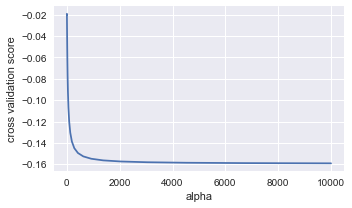

In [127]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-1, 4, 30)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(linear_model.Ridge(alpha, normalize=True), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas, scores)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [131]:
np.argmax(scores)

3

In [130]:
alphas[3]

0.32903445623126687

In [132]:
ridge_1st = linear_model.Ridge(0.329)

In [133]:
ridge_1st.fit(x_train, y_train)

Ridge(alpha=0.329, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [134]:
ridge_1st.score(x_train, y_train)

0.94339705941026075